## 2 Exploring Relationships

### CONTENTS:
### 1. Importing Libraries & data
### 2. Consistency checks
### 3. Pick variables that are suitable for your exploratory visual analysis.
### 4. Correlation matrix heatmap.
### 5. Scatterplots for the variables with the strongest correlations.
### 6. Pair plot of data set.
### 7. Categorical plot.
### 8. Revisit questions created preaviously. 
### 9. Define hypotheses at this point.

### 1. Importing Libraries & data

In [1]:
# Import libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import data:
# Create string of location
path = '/Users/aegarcia/Desktop/Data analytics/6. Adv Analytics & Dasboard design'
# Import countries.csv
df_car = pd.read_csv(os.path.join(path, '2 Data', 'Prepared data', 'accidents_cleaned.csv'), index_col = False)

### 2. Consistency Checks

In [3]:
# Check version of matplot lib
matplotlib.__version__

'3.3.2'

#### It is above 3.1.1 so there should be no issues!

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
# Check column names
df_car.columns

Index(['Unnamed: 0', 'number', 'state', 'date', 'weekday', 'county', 'time',
       'hour', 'total_vehicles', 'persons', 'fatalities', 'route_type',
       'urban_rural', 'driver_age', 'driver_gender', 'driver_license',
       'car_year', 'car_make', 'car_model', 'speed_limit', 'above_limit',
       'weather', 'driver_drugs', 'drug_category', 'type_drugs',
       'driver_alcohol', 'alcohol_level (%)', 'death_race', 'age_range'],
      dtype='object')

In [6]:
# Drop the first columns
df_car = df_car.drop(columns = ['Unnamed: 0'])

In [7]:
# Check how data looks like
pd.options.display.max_columns = None
df_car.head()

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range
0,0,Alabama,"January 1, 2020",Wednesday,ELMORE,2:58,2,1,4,3,County Road,Rural,24,Male,Suspended,1997.0,Lexus,ES,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.294,Black or African American,Young adult
1,1,Alabama,"January 2, 2020",Thursday,JEFFERSON,17:18,17,4,6,1,Local Street,Urban,40,Female,Suspended,1993.0,Chevrolet,Corsica,35,No,Rain,Yes,Opioid,FENTANYL,No,0.000,Not a Fatality (not Applicable),Adult
2,2,Alabama,"January 2, 2020",Thursday,SHELBY,14:55,14,2,2,1,State Highway,Rural,34,Female,Revoked,1995.0,Toyota,Camry,65,Yes,Rain,No,No drug,Test Not Given,No,0.000,White,Young adult
3,3,Alabama,"January 3, 2020",Friday,CALHOUN,15:20,15,1,5,1,County Road,Rural,17,Male,Valid,2007.0,Hyundai,Azera,35,Yes,Cloudy,Yes,Depressant,DELTA 9,No,0.000,Not a Fatality (not Applicable),Teenager
4,4,Alabama,"January 4, 2020",Saturday,COOSA,0:45,0,1,1,1,County Road,Rural,47,Female,Valid,2013.0,GMC,Yukon,45,No,Rain,No,No drug,Test Not Given,No,0.000,White,Adult


In [8]:
# Check for missing values
df_car.isnull().sum() 

number               0
state                0
date                 0
weekday              0
county               0
time                 0
hour                 0
total_vehicles       0
persons              0
fatalities           0
route_type           0
urban_rural          0
driver_age           0
driver_gender        0
driver_license       0
car_year             0
car_make             0
car_model            0
speed_limit          0
above_limit          0
weather              0
driver_drugs         0
drug_category        0
type_drugs           0
driver_alcohol       0
alcohol_level (%)    0
death_race           0
age_range            0
dtype: int64

In [9]:
df_car.describe()

,number,hour,total_vehicles,persons,fatalities,driver_age,car_year,speed_limit,alcohol_level (%)
count,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000,34347.000000
mean,17173.000000,13.219000,1.568754,2.204443,1.087984,41.772586,2008.275599,48.685911,0.035159
std,9915.269184,6.797849,0.783246,1.604276,0.346687,18.355673,7.665318,13.103441,0.078894
min,0.000000,0.000000,1.000000,1.000000,1.000000,7.000000,1923.000000,10.000000,0.000000
25%,8586.500000,8.000000,1.000000,1.000000,1.000000,26.000000,2003.000000,40.000000,0.000000
50%,17173.000000,14.000000,1.000000,2.000000,1.000000,38.000000,2008.000000,50.000000,0.000000
75%,25759.500000,19.000000,2.000000,3.000000,1.000000,55.000000,2015.000000,55.000000,0.000000
max,34346.000000,23.000000,15.000000,61.000000,8.000000,100.000000,2021.000000,85.000000,0.558000


## 3. Pick variables that are suitable for your exploratory visual analysis.

In [11]:
# Create a subset excluding the "Date" and "No" columns

sub = df_car[['total_vehicles', 'persons', 'fatalities', 'driver_age', 'car_year', 'speed_limit', 'alcohol_level (%)']]

In [12]:
# Create a correlation matrix using pandas
sub.corr()

,total_vehicles,persons,fatalities,driver_age,car_year,speed_limit,alcohol_level (%)
total_vehicles,1.000000,0.630421,0.128692,0.016000,0.067976,0.073123,-0.079415
persons,0.630421,1.000000,0.281646,-0.083154,0.049488,0.090418,-0.075322
fatalities,0.128692,0.281646,1.000000,-0.055867,0.026997,0.076469,0.021070
driver_age,0.016000,-0.083154,-0.055867,1.000000,-0.032465,0.005584,-0.090533
car_year,0.067976,0.049488,0.026997,-0.032465,1.000000,-0.013994,-0.038654
speed_limit,0.073123,0.090418,0.076469,0.005584,-0.013994,1.000000,-0.003101
alcohol_level (%),-0.079415,-0.075322,0.021070,-0.090533,-0.038654,-0.003101,1.000000


## 4. Correlation matrix heatmap.

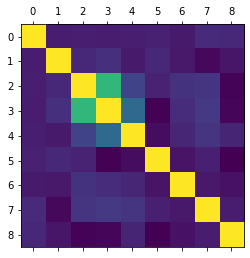

In [13]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_car.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

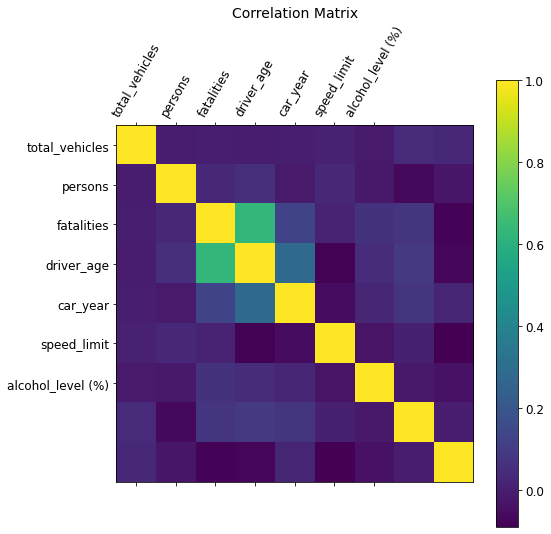

In [14]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize= (8, 8)) # figure size 
plt.matshow(df_car.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=60) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Correlation heatmap usind seaborn

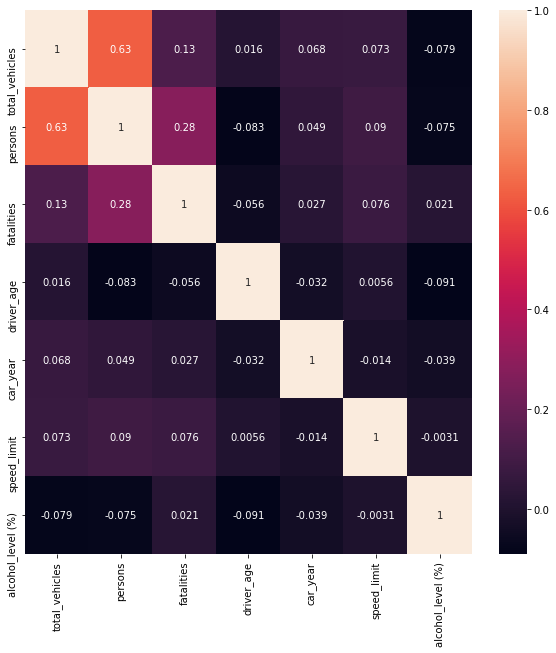

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### Most of the variables are not correlated at all. Only the number of people and the number of vehicles involved in the car accident seem to have a positive somewhat strong correlation (0.63)

## 5. Scatterplots for the variables with the strongest correlations.

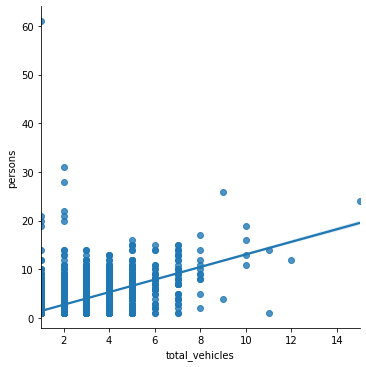

In [16]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'total_vehicles', y = 'persons', data = sub)

In [17]:
df_many_cars = df_car.loc[df_car['persons']>=20]
df_many_cars

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range
120,120,Alabama,"March 2, 2020",Monday,TALLADEGA,7:10,7,2,21,1,State Highway,Rural,41,Female,Valid,2010.0,Hyundai,Sonata,55,Yes,Rain,Yes,Stimulant,AMPHETAMINE,No,0.0,White,Adult
3856,3856,California,"February 22, 2020",Saturday,SAN DIEGO,10:23,10,1,21,3,Interstate,Rural,52,Male,Valid,2014.0,Freightliner,S2 106 Bus Chassis,70,Yes,Rain,No,No drug,Test Not Given,No,0.0,Not a Fatality (not Applicable),Adult
6223,6223,Colorado,"October 14, 2020",Wednesday,LARIMER,16:17,16,15,24,1,Local Street,Urban,73,Male,Valid,2005.0,Roadmaster,Roadmaster,45,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.0,Not a Fatality (not Applicable),Older Adult
12363,12363,Indiana,"January 5, 2020",Sunday,BOONE,11:5,11,9,26,3,Interstate,Rural,34,Male,Valid,2019.0,Freightliner,"New Cascadia 126"" Sleepercab",70,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",No,0.0,Not a Fatality (not Applicable),Young adult
14937,14937,Louisiana,"September 20, 2020",Sunday,ST. TAMMANY,18:48,18,2,22,1,State Highway,Urban,33,Female,Valid,2001.0,Ford,E-350,45,No,Cloudy,No,No drug,Test Not Given,No,0.0,Not a Fatality (not Applicable),Young adult
21819,21819,North Carolina,"February 14, 2020",Friday,HALIFAX,15:54,15,2,28,1,Other,Urban,46,Male,Valid,2008.0,Freightliner,B2 Bus Chassis,45,No,Clear,No,No drug,Reported as Unknown if Tested for Drugs,No,0.0,Not a Fatality (not Applicable),Adult
25366,25366,Pennsylvania,"January 5, 2020",Sunday,WESTMORELAND,3:30,3,1,61,1,Interstate,Rural,58,Male,Valid,2005.0,Van Hool,Commuter Coach,70,Yes,Snow,No,No drug,"Tested, No Drugs Found/Negative",No,0.0,Chinese,Adult
28286,28286,Tennessee,"October 27, 2020",Tuesday,MEIGS,15:45,15,2,20,2,State Highway,Rural,56,Male,Valid,2018.0,Freightliner,M2,55,No,Clear,Yes,Positive - Unknown,Other Drug,No,0.0,Not a Fatality (not Applicable),Adult
30791,30791,Texas,"September 14, 2020",Monday,BAYLOR,13:55,13,2,31,1,U.S. Highway,Rural,49,Male,Valid,2012.0,Dodge,Ram,60,No,Cloudy,No,No drug,Negative,No,0.0,Not a Fatality (not Applicable),Adult
30833,30833,Texas,"September 29, 2020",Tuesday,OLDHAM,7:15,7,1,20,1,Interstate,Rural,71,Male,Valid,2019.0,Motor Coach Industries,J4500 Intercity,65,No,Clear,No,No drug,Test Not Given,No,0.0,White,Older Adult


### It seems there are several outliers on the graph. It seems that these accidents involved buses so that is why there are so many people involved in those accidents.  
### Next, I will create a subset of including only those accidents that have 20 people involved or less.

In [18]:
sub_people_20less = df_car.loc[df_car['persons']<=19]
sub_people_20less

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range
0,0,Alabama,"January 1, 2020",Wednesday,ELMORE,2:58,2,1,4,3,County Road,Rural,24,Male,Suspended,1997.0,Lexus,ES,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.294,Black or African American,Young adult
1,1,Alabama,"January 2, 2020",Thursday,JEFFERSON,17:18,17,4,6,1,Local Street,Urban,40,Female,Suspended,1993.0,Chevrolet,Corsica,35,No,Rain,Yes,Opioid,FENTANYL,No,0.000,Not a Fatality (not Applicable),Adult
2,2,Alabama,"January 2, 2020",Thursday,SHELBY,14:55,14,2,2,1,State Highway,Rural,34,Female,Revoked,1995.0,Toyota,Camry,65,Yes,Rain,No,No drug,Test Not Given,No,0.000,White,Young adult
3,3,Alabama,"January 3, 2020",Friday,CALHOUN,15:20,15,1,5,1,County Road,Rural,17,Male,Valid,2007.0,Hyundai,Azera,35,Yes,Cloudy,Yes,Depressant,DELTA 9,No,0.000,Not a Fatality (not Applicable),Teenager
4,4,Alabama,"January 4, 2020",Saturday,COOSA,0:45,0,1,1,1,County Road,Rural,47,Female,Valid,2013.0,GMC,Yukon,45,No,Rain,No,No drug,Test Not Given,No,0.000,White,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34342,34342,Wyoming,"December 12, 2020",Saturday,LARAMIE,16:36,16,2,2,1,County Road,Rural,62,Male,Valid,2012.0,Ford,F-250,45,No,Snow,No,No drug,Test Not Given,No,0.000,Not a Fatality (not Applicable),Older Adult
34343,34343,Wyoming,"December 18, 2020",Friday,LINCOLN,18:6,18,3,8,2,U.S. Highway,Rural,31,Female,Valid,2002.0,Dodge,Ram,65,No,Clear,No,No drug,Test Not Given,No,0.000,Not a Fatality (not Applicable),Young adult
34344,34344,Wyoming,"December 11, 2020",Friday,FREMONT,17:30,17,3,9,1,State Highway,Rural,67,Male,Valid,2004.0,Honda,Accord,55,Yes,Snow,No,No drug,"Tested, No Drugs Found/Negative",No,0.000,North American Indian or Alaska Native,Older Adult
34345,34345,Wyoming,"December 15, 2020",Tuesday,LARAMIE,20:21,20,2,3,1,U.S. Highway,Urban,18,Female,Valid,2000.0,Buick,LeSabre,30,Yes,Clear,Yes,Cannabis,Tetrahydrocannabinols (THC),No,0.000,Not a Fatality (not Applicable),Teenager


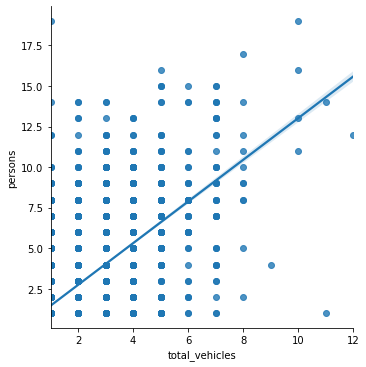

In [19]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'total_vehicles', y = 'persons', data = sub_people_20less)

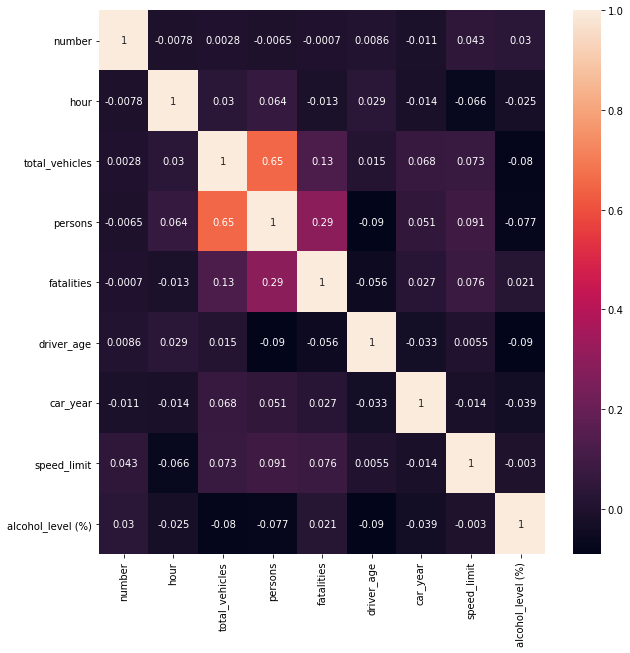

In [20]:
# Lets check the correlatins of only 20 people or less are at an accidents
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix.
corr = sns.heatmap(sub_people_20less.corr(), annot = True, ax = ax) 

### The correlation coefficient changed from 0.63 to 0.65 by doing this, still not very strong, but is an improvement.

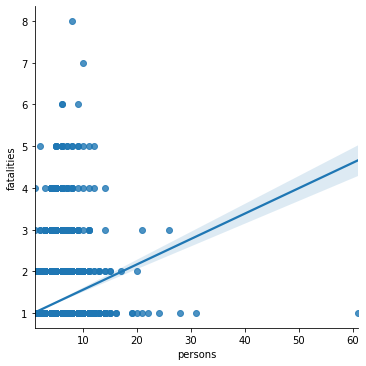

In [21]:
# Create a scatterplot for the number of people involved and number of fatalities.

sns.lmplot(x = 'persons', y = 'fatalities', data = sub)

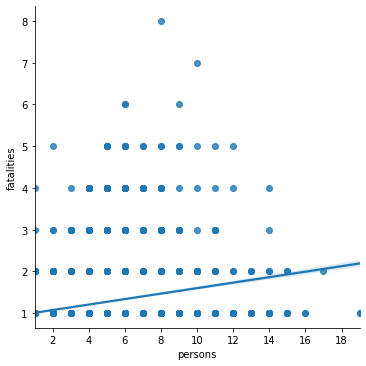

In [22]:
# Create a scatterplot for the number of people involved and number of fatalities using only accidents with less than 20 people.

sns.lmplot(x = 'persons', y = 'fatalities', data = sub_people_20less)

### Still not strong but this makes me think that I should create another column to classify the type of car.
### There is a car-type variable already but it has toomany types of car, I should reduce that number to maybe 5, so we can se better reults. 

## 6. Pair plot of data set.

In [23]:
# Keep only the variables you want to use in the pair plot

sub_2 = df_car[['total_vehicles', 'persons', 'fatalities','driver_age', 'speed_limit']]

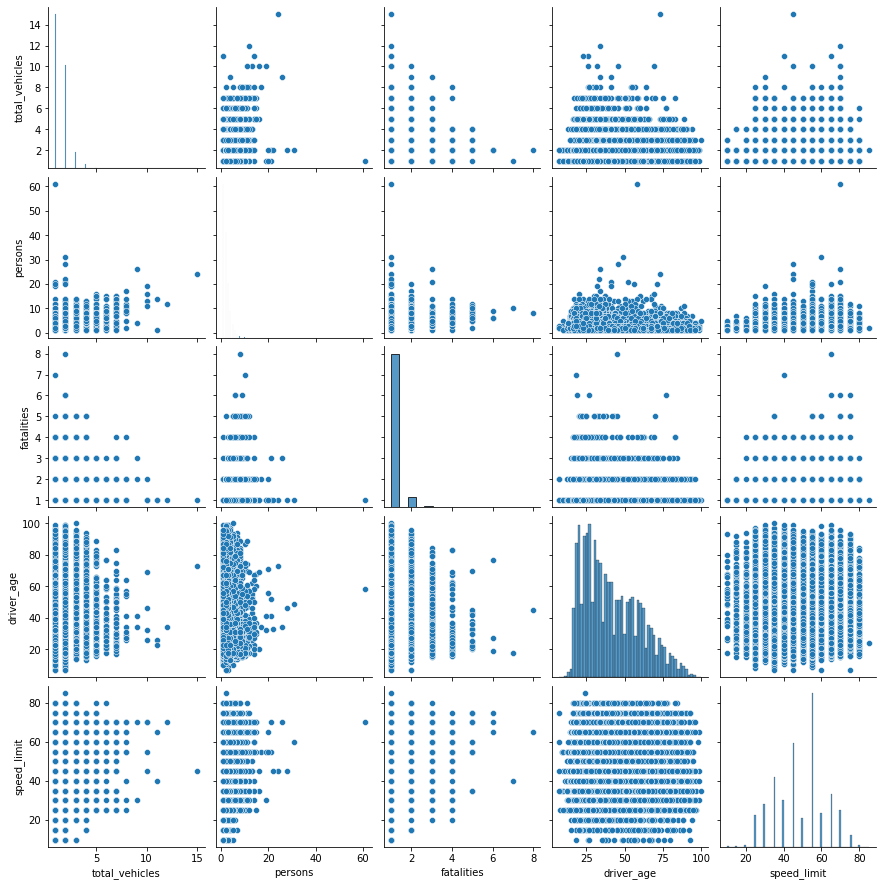

In [24]:
# Create a pair plot 

g = sns.pairplot(sub_2)

### The variable 'driver_age' looks OK with combined with 'persons' and 'total_vehicles'. The other distributions look all over the place, that is why their correlation coefficients are so low!

## 7. Categorical plot.

<AxesSubplot:xlabel='driver_age', ylabel='Count'>

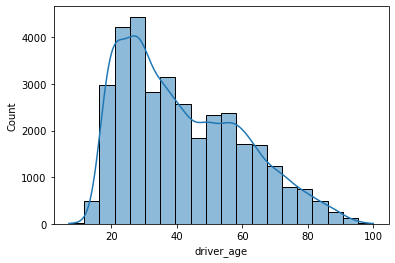

In [25]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df_car['driver_age'], bins = 20, kde = True)

#### Most accidents are young adults, in their 20s and 30s.

In [26]:
# Change numerica data to categorical:
df_car.loc[df_car['driver_age'] < 16, 'age_range'] = 'Too young to drive'
df_car.loc[(df_car['driver_age'] >= 16) & (df_car['driver_age'] < 20), 'age_range'] = 'Teenager'
df_car.loc[(df_car['driver_age'] >= 20) & (df_car['driver_age'] < 40), 'age_range'] = 'Young adult'
df_car.loc[(df_car['driver_age'] >= 40) & (df_car['driver_age'] < 60), 'age_range'] = 'Adult'
df_car.loc[(df_car['driver_age'] >= 60) & (df_car['driver_age'] < 80), 'age_range'] = 'Older Adult'
df_car.loc[df_car['driver_age'] >= 80, 'age_range'] = 'Elderly'

In [27]:
df_car['age_range'].value_counts(dropna = False)

Young adult           15560
Adult                  9536
Older Adult            5475
Teenager               2405
Elderly                1191
Too young to drive      180
Name: age_range, dtype: int64

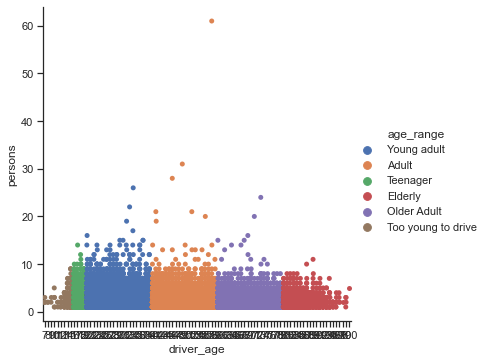

In [28]:
# Create a categorical plot in seaborn using the driver's age ranges:

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'persons', hue = 'age_range', data = df_car)

#### We can notice that when young kids get into an accident, only a few people are affected. Then teenagers and young adults tend to involve more people in the type of accidents they get into, and maybe speed might play a role here. People over than 60 might get in not so bad accidents. Finally the accidents people over 80 years of age get into luckily are less and include less people.

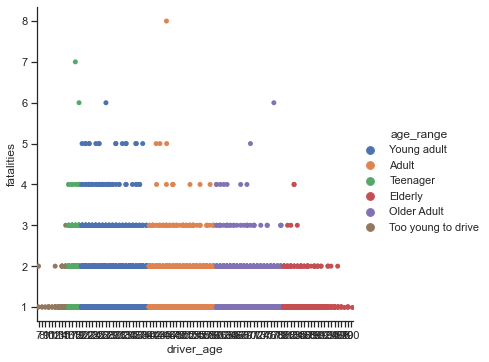

In [29]:
# Create a categorical plot in seaborn using the driver's age ranges:

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'fatalities', hue = 'age_range', data = df_car)

### We can see that there are more deaths when young adults and adults (20 - 45) get into a car accident more fatalities are observed. But also it is important to note thar some teenagers also have a bigh number of fatalities, considering the size of this group.

In [30]:
# Change numerical data to categorical:
df_car.loc[df_car['speed_limit'] < 30, 'speed_range'] = '30mph and below'
df_car.loc[(df_car['speed_limit'] >= 30) & (df_car['speed_limit'] < 60), 'speed_range'] = '31 - 59 mph'
df_car.loc[df_car['speed_limit'] >= 60, 'speed_range'] = '60mph and above'

In [31]:
df_car['speed_range'].value_counts(dropna = False)

31 - 59 mph        24742
60mph and above     7635
30mph and below     1970
Name: speed_range, dtype: int64

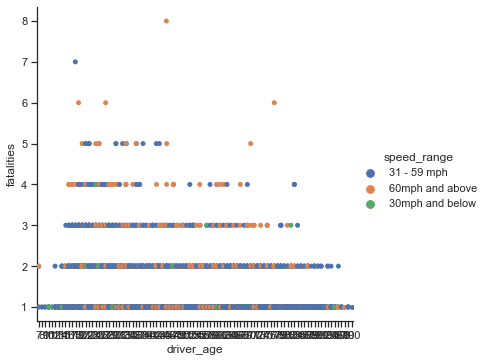

In [32]:
# Create a categorical plot in seaborn using the driver's age ranges:

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'fatalities', hue = 'speed_range', data = df_car)

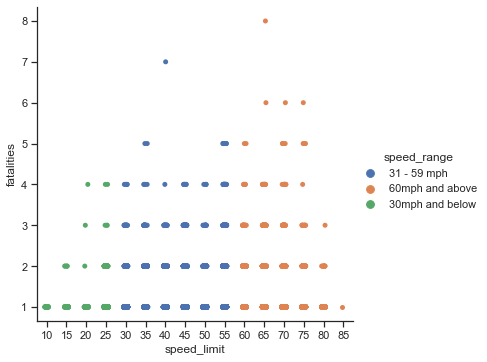

In [33]:
# Create a categorical plot in seaborn using the driver's age ranges:

sns.set(style = 'ticks')
g = sns.catplot(x = 'speed_limit', y = 'fatalities', hue = 'speed_range', data = df_car)

### The correlation is weak, but we can still note that higher speed limits tend to have more fatalities.

## 8. Revisit questions created preaviously. 

### These are the questions I had: 
### 1.	Some people use alcohol and/or drugs before driving, which of these 2 uses results in more accidents?
### 2.	What is the most common drug involved in car accidents?
### 3.	Which state(s) do people have more car accidents?
### 4.	When are there more car accidents reported? During the morning commute? Weekend nights? Lunch time?

### 1.	Some people use alcohol and/or drugs before driving, which of these 2 uses results in more accidents?

In [34]:
# Create a column to note if the driver was under the influence of drugs, alcohol, or both.
df_car.loc[df_car['driver_alcohol'] == 'Yes', 'drug_alcohol_use'] = 'alcohol'
df_car.loc[df_car['driver_drugs'] == 'Yes', 'drug_alcohol_use'] = 'drugs'
df_car.loc[(df_car['driver_drugs'] == 'Yes') & (df_car['driver_alcohol'] == 'Yes'), 'drug_alcohol_use'] = 'both'

In [35]:
# Get counts of each 
df_car['drug_alcohol_use'].value_counts(dropna = False)

NaN        23036
drugs       4515
alcohol     3925
both        2871
Name: drug_alcohol_use, dtype: int64

In [36]:
# Rename NaNs
values = {'drug_alcohol_use': 'none', }
df_car.fillna(value=values, inplace=True)

In [37]:
# Check counts again
df_car['drug_alcohol_use'].value_counts(dropna = False)

none       23036
drugs       4515
alcohol     3925
both        2871
Name: drug_alcohol_use, dtype: int64

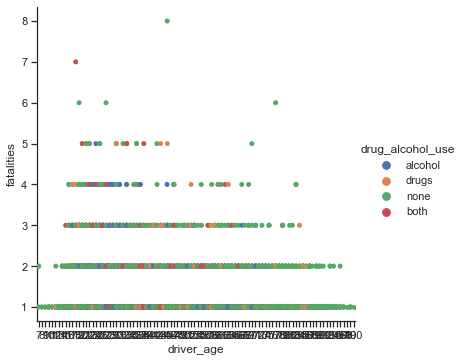

In [38]:
# Create a categorical plot in seaborn using the driver's age ranges:

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'fatalities', hue = 'drug_alcohol_use', data = df_car)

### I don't like it, so I will create a subset that includes only the people that are under the influence of drugs, alcohol, or both. 

In [50]:
sub_drugs_alcohol = df_car.loc[df_car['drug_alcohol_use'].isin(['alcohol', 'drugs', 'both'])]
sub_drugs_alcohol

,number,state,date,weekday,county,time,hour,total_vehicles,persons,fatalities,route_type,urban_rural,driver_age,driver_gender,driver_license,car_year,car_make,car_model,speed_limit,above_limit,weather,driver_drugs,drug_category,type_drugs,driver_alcohol,alcohol_level (%),death_race,age_range,speed_range,drug_alcohol_use,weekday_no
0,0,Alabama,"January 1, 2020",Wednesday,ELMORE,2:58,2,1,4,3,County Road,Rural,24,Male,Suspended,1997.0,Lexus,ES,45,Yes,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.294,Black or African American,Young adult,31 - 59 mph,alcohol,3.0
1,1,Alabama,"January 2, 2020",Thursday,JEFFERSON,17:18,17,4,6,1,Local Street,Urban,40,Female,Suspended,1993.0,Chevrolet,Corsica,35,No,Rain,Yes,Opioid,FENTANYL,No,0.000,Not a Fatality (not Applicable),Adult,31 - 59 mph,drugs,4.0
3,3,Alabama,"January 3, 2020",Friday,CALHOUN,15:20,15,1,5,1,County Road,Rural,17,Male,Valid,2007.0,Hyundai,Azera,35,Yes,Cloudy,Yes,Depressant,DELTA 9,No,0.000,Not a Fatality (not Applicable),Teenager,31 - 59 mph,drugs,5.0
5,5,Alabama,"January 4, 2020",Saturday,MORGAN,16:55,16,2,3,1,State Highway,Rural,46,Male,Valid,2005.0,Ford,Mustang,55,No,Clear,Yes,Opioid,FENTANYL,No,0.000,White,Adult,31 - 59 mph,drugs,6.0
6,6,Alabama,"January 7, 2020",Tuesday,JEFFERSON,19:23,19,1,1,1,County Road,Urban,28,Female,Valid,2014.0,Chevrolet,Cruze,40,No,Clear,Yes,Cannabis,DELTA 9,No,0.000,Not a Fatality (not Applicable),Young adult,31 - 59 mph,drugs,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34330,34330,Wyoming,"October 21, 2020",Wednesday,FREMONT,6:18,6,2,2,1,U.S. Highway,Rural,37,Male,Valid,2017.0,International,MA025,55,No,Cloudy,Yes,Cannabis,MARIJUANA/Marihuana,No,0.000,Not a Fatality (not Applicable),Young adult,31 - 59 mph,drugs,3.0
34335,34335,Wyoming,"November 2, 2020",Monday,FREMONT,17:20,17,1,4,1,State Highway,Rural,23,Male,Not licensed,2003.0,Chevrolet,Silverado,55,Yes,Clear,Yes,Stimulant,AMPHETAMINE,No,0.000,Not a Fatality (not Applicable),Young adult,31 - 59 mph,drugs,1.0
34336,34336,Wyoming,"November 14, 2020",Saturday,FREMONT,5:25,5,1,1,1,County Road,Rural,54,Male,Valid,2017.0,Ford,F-150,55,Yes,Clear,No,No drug,Test Not Given,Yes,0.180,Not a Fatality (not Applicable),Adult,31 - 59 mph,alcohol,6.0
34340,34340,Wyoming,"December 9, 2020",Wednesday,CONVERSE,19:13,19,1,1,1,Interstate,Rural,56,Female,Valid,2002.0,Ford,Ranger,75,No,Clear,No,No drug,"Tested, No Drugs Found/Negative",Yes,0.090,White,Adult,60mph and above,alcohol,3.0


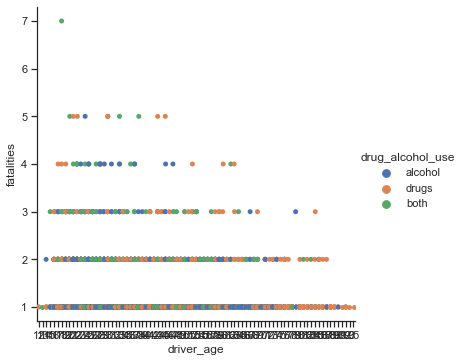

In [40]:
# Create a categorical plot in seaborn using the subset created

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'fatalities', hue = 'drug_alcohol_use', data = sub_drugs_alcohol)

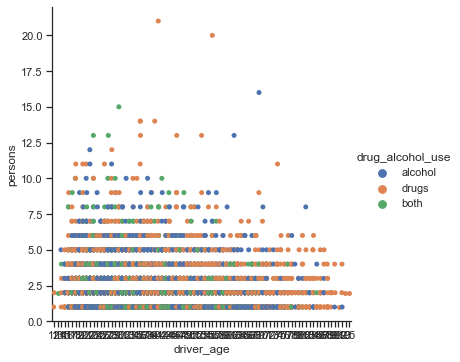

In [41]:
# Create a categorical plot in seaborn using the subset created

sns.set(style = 'ticks')
g = sns.catplot(x = 'driver_age', y = 'persons', hue = 'drug_alcohol_use', data = sub_drugs_alcohol)

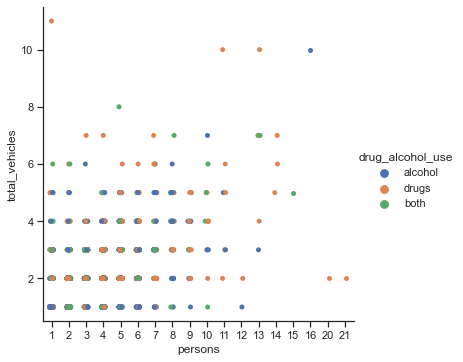

In [42]:
# Create a categorical plot in seaborn using the subset created

sns.set(style = 'ticks')
g = sns.catplot(x = 'persons', y = 'total_vehicles', hue = 'drug_alcohol_use', data = sub_drugs_alcohol)

#### So we know that from the people that get into an accidents and are under the influence of a substance, most of them are using a type of drug, then, alcohol and then both. 
#### We can notice on the previous chart that when there are more people involved in the accidents, drugs was more commonly used by the driver. 

### 2.	What is the most common drug involved in car accidents?

In [43]:
# Check counts of types of drugs used
sub_drugs_alcohol['type_drugs'].value_counts(dropna = False)

Tested, No Drugs Found/Negative           2330
AMPHETAMINE                               1015
Test Not Given                             873
DELTA 9                                    872
Tetrahydrocannabinols (THC)                798
                                          ... 
Nitrous Oxide                                1
Gamma Hydroxybutyric Acid preparations       1
Zopiclone                                    1
MEPERIDINE (Pethidine)                       1
PHENMETRAZINE                                1
Name: type_drugs, Length: 92, dtype: int64

#### The first category 'Tested, No Drugs Found/Negative' included the drivers that used only alcohol. The rest is a list of 91 different. I will have to make some research to create bigger groups. But we can notice that amphetamines are the drug mostly used when a driver under the influence of a drug gets into a car accident.

### 3.	Which state(s) do people have more car accidents?

In [44]:
# Check counts of types of drugs used
df_car['state'].value_counts(dropna = False)

Texas                   3360
California              3347
Florida                 2967
Georgia                 1467
North Carolina          1374
Ohio                    1102
Tennessee               1056
Pennsylvania            1025
Illinois                1020
Michigan                 974
South Carolina           937
New York                 928
Missouri                 886
Arizona                  879
Alabama                  826
Indiana                  781
Virginia                 772
Louisiana                732
Kentucky                 684
Mississippi              672
Oklahoma                 584
Arkansas                 567
Wisconsin                557
Colorado                 556
New Jersey               519
Maryland                 516
Washington               510
Oregon                   441
Kansas                   371
Minnesota                366
New Mexico               344
Massachusetts            320
Iowa                     303
Nevada                   280
Connecticut   

#### And the top 5 states with the most accidents are California, Texas, Florida, Georgia, and North Carolina.

### 4.	When are there more car accidents reported? During the morning commute? Weekend nights? Lunch time?

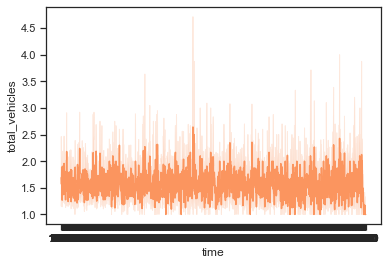

In [45]:
# This linegraph show how many cars get in accidents during the day.
# Create line graph using the time of the day and total vehicles
line_time_vehicles = sns.lineplot(data = df_car, color = '#fb955f', x = 'time', y = 'total_vehicles')
# plt.tight_layout()
# Save it                                                                 
line_time_vehicles.figure.savefig(os.path.join(path,'4 Visualizations', 'line_time_vehicles.png'))

#### So this does not tell us much. Maybe there is a peak during he afternoon.  I dont want to do much with the time and the day of the week, since it migth be cumming up on the next task. 

In [46]:
# Create a column to note if the driver was under the influence of drugs, alcohol, or both.
df_car.loc[df_car['weekday'] == 'Monday', 'weekday_no'] = 1
df_car.loc[df_car['weekday'] == 'Tuesday', 'weekday_no'] = 2
df_car.loc[df_car['weekday'] == 'Wednesday', 'weekday_no'] = 3
df_car.loc[df_car['weekday'] == 'Thursday', 'weekday_no'] = 4
df_car.loc[df_car['weekday'] == 'Friday', 'weekday_no'] = 5
df_car.loc[df_car['weekday'] == 'Saturday', 'weekday_no'] = 6
df_car.loc[df_car['weekday'] == 'Sunday', 'weekday_no'] = 7

In [47]:
# Check counts of types of drugs used
df_car['weekday_no'].value_counts(dropna = False)

6.0    5927
7.0    5347
5.0    5282
4.0    4638
3.0    4514
2.0    4353
1.0    4286
Name: weekday_no, dtype: int64

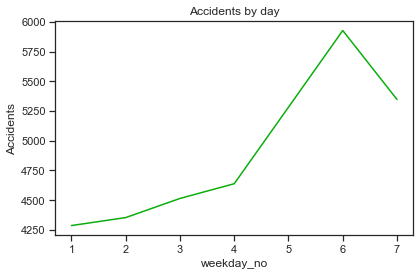

In [48]:
# Count Accidents per day of the week
count_accidents_day = df_car.groupby('weekday_no').agg({'date': ['count']})
# Create line graph
line_acc_day = count_accidents_day.plot.line(color = '#0aad0a', xlabel= 'hour', ylabel= 'Accidents', title = 'Accidents by hour', legend=False)
plt.tight_layout()
# Save it                                                                 
line_acc_day.figure.savefig(os.path.join(path, '4 Visualizations', 'line_acc_day.png'))

### We notice that Friday, Saturday and Sunday have more accidents than the rest of the week. 

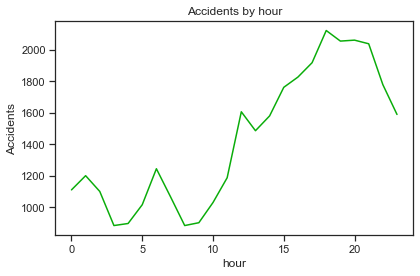

In [51]:
# Count Accidents per hour of the day
count_accidents_hour = df_car.groupby('hour').agg({'date': ['count']})
# Create line graph
line_acc_hour = count_accidents_hour.plot.line(color = '#0aad0a', xlabel= 'hour', ylabel= 'Accidents', title = 'Accidents by hour', legend=False)
plt.tight_layout()
# Save it                                                                 
line_acc_hour.figure.savefig(os.path.join(path, '4 Visualizations', 'line_acc_hour.png'))

In [52]:
# Check counts of types of drugs used
df_car['hour'].value_counts(dropna = False)

18    2121
20    2060
19    2054
21    2037
17    1917
16    1826
22    1778
15    1761
12    1606
23    1589
14    1580
13    1486
6     1245
1     1201
11    1188
0     1111
2     1101
7     1067
10    1031
5     1017
9      903
4      898
8      885
3      885
Name: hour, dtype: int64

### SO from 4 - 9pm is wheh there are more accidents in the US roads

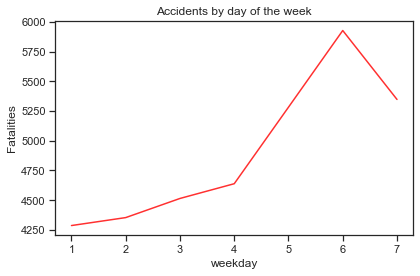

In [53]:
# Now fatalities per day of the day
count_fatal_day = df_car.groupby('weekday_no').agg({'date': ['count']})
# Create line graph
line_fatal_day = count_fatal_day.plot.line(color = '#FF3030', xlabel= 'weekday', ylabel= 'Fatalities', title = 'Accidents by day of the week', legend=False)
plt.tight_layout()
# Save it                                                                 
line_fatal_day.figure.savefig(os.path.join(path, '4 Visualizations', 'line_fatal_day.png'))

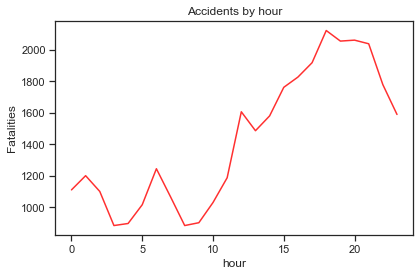

In [54]:
# Now fatalities per hour of the day
count_fatal_hour = df_car.groupby('hour').agg({'date': ['count']})
# Create line graph
line_fatal_hour = count_fatal_hour.plot.line(color = '#FF3030', xlabel= 'hour', ylabel= 'Fatalities', title = 'Accidents by hour', legend=False)
plt.tight_layout()
# Save it                                                                 
line_fatal_hour.figure.savefig(os.path.join(path, '4 Visualizations', 'line_fatal_hour.png'))

## 9. Define hypotheses at this point.

### So far we noticed that there is somewhat strong positve correlation between the number of people and number of cars involved in an accident. People under the influence use mostly drugs. And people between the ages of 20 - 40 are involve in more accidents compared to the other age groups. I believe time would be better correlated with the number of accidents and maybe even number of fatalities. Also during the weekend, the number of accidents increases. I still have to see what happends every hour.
### So my hypothesis could be :
## "If more accidents occur during the weekend then alcohol and drugs are factors of these accident increase"

In [49]:
# Export data
df_car.to_csv(os.path.join(path, '2 Data','Prepared data', 'accidents_clean2.csv'))

### The End! 